In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os
import glob
import numpy as np

In [2]:
import matplotlib.pyplot as plt

plt.rc('font', family='NanumBarunGothic') 
plt.style.use("ggplot")
pd.set_option('mode.chained_assignment',  None)

# COVID19 진행 상황

In [3]:
covid_data=pd.read_csv('data/Covid_case.csv')
covid_data.head()

,Unnamed: 0,accDefRate,accExamCnt,accExamCompCnt,careCnt,clearCnt,createDt,deathCnt,decideCnt,examCnt,resutlNegCnt,seq,stateDt,stateTime,updateDt,Unnamed: 15
0,0.0,2.255638,14285339.0,13229116.0,29546.0,266414.0,2021-09-25 10:49:15.225,2441.0,298401.0,1056223.0,12930715.0,646.0,20210925.0,00:00,2021-09-26 10:29:10.433,3269.0
1,1.0,2.237343,14221685.0,13191185.0,28206.0,264492.0,2021-09-24 09:53:29.116,2434.0,295132.0,1030500.0,12896053.0,645.0,20210924.0,00:00,NaN,2433.0
2,2.0,2.231558,14151069.0,13116349.0,27430.0,262842.0,2021-09-23 10:01:14.491,2427.0,292699.0,1034720.0,12823650.0,644.0,20210923.0,00:00,NaN,1716.0
3,3.0,2.218799,14112435.0,13114439.0,26752.0,261812.0,2021-09-22 09:35:53.93,2419.0,290983.0,997996.0,12823456.0,643.0,20210922.0,00:00,NaN,1720.0
4,4.0,2.205520,14081284.0,13115409.0,26760.0,260090.0,2021-09-21 09:39:49.437,2413.0,289263.0,965875.0,12826146.0,642.0,20210921.0,00:00,NaN,1729.0


In [4]:
# 코로나 일별 확진자 수 칼럼 추가
# 정수형 stateDt를 Datetime형 stateDt로 변환 후 인덱스로 설정

covid_data['daily_decideCnt']=covid_data.decideCnt.shift()-covid_data.decideCnt
covid_data_new=covid_data[['stateDt','daily_decideCnt','decideCnt','deathCnt']]
covid_data_new.index=pd.to_datetime(covid_data_new['stateDt'],format='%Y%m%d')
covid_data_new=covid_data_new.drop('stateDt',axis=1)
covid_data_new['year']=covid_data_new.index.year
covid_data_new['month']=covid_data_new.index.month
covid_data_new.head()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2021-09-25,NaN,298401.0,2441.0,2021.0,9.0
2021-09-24,3269.0,295132.0,2434.0,2021.0,9.0
2021-09-23,2433.0,292699.0,2427.0,2021.0,9.0
2021-09-22,1716.0,290983.0,2419.0,2021.0,9.0
2021-09-21,1720.0,289263.0,2413.0,2021.0,9.0


In [5]:
# 일별 확진자수 분포 확인

covid_data_new.describe().daily_decideCnt

count     602.000000
mean      495.682724
std       553.211568
min         0.000000
25%        61.250000
50%       362.500000
75%       652.000000
max      3269.000000
Name: daily_decideCnt, dtype: float64

<AxesSubplot:title={'center':'The Cumulative Trend Of COVID-19 Confirmed cases'}, xlabel='stateDt', ylabel='decideCnt'>

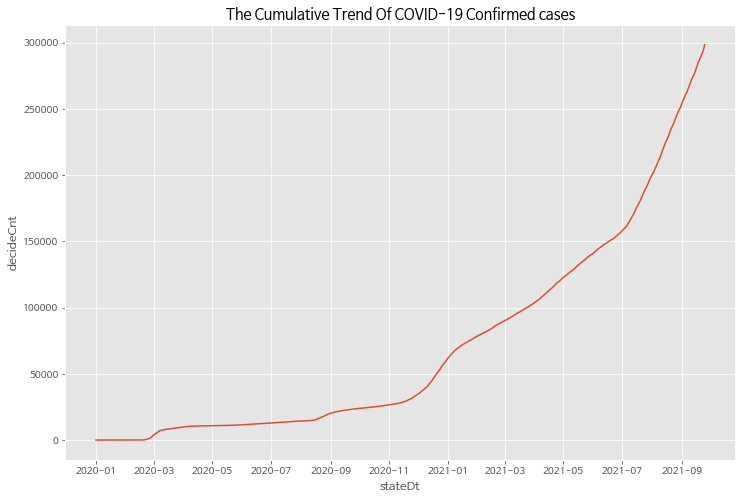

In [6]:
# 코로나 누적 확진자 시각화

plt.figure(figsize=(12,8))
plt.title('The Cumulative Trend Of COVID-19 Confirmed cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='decideCnt')

<AxesSubplot:title={'center':'Daily Trend Of COVID-19 Confirmed Cases'}, xlabel='stateDt', ylabel='daily_decideCnt'>

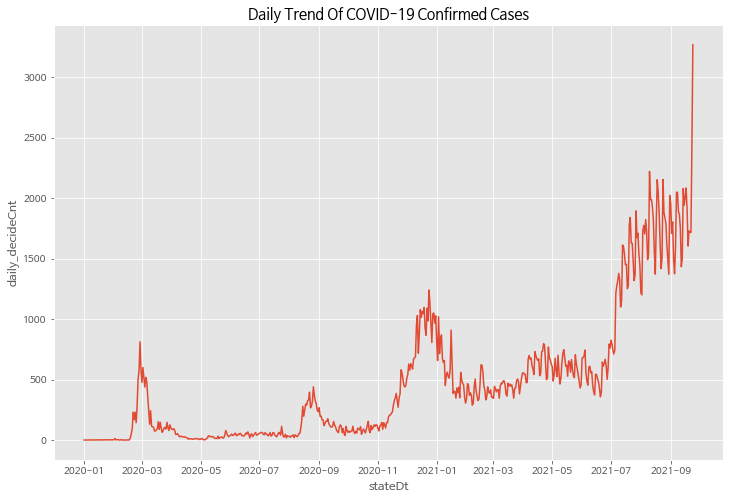

In [7]:
# 코로나 일별 확진자 시각화

plt.figure(figsize=(12,8))
plt.title('Daily Trend Of COVID-19 Confirmed Cases')
sns.lineplot(data=covid_data_new, x='stateDt', y='daily_decideCnt')

<AxesSubplot:title={'center':'The Trend Of COVID-19 Confirmed Cases Per Month'}, xlabel='year,month'>

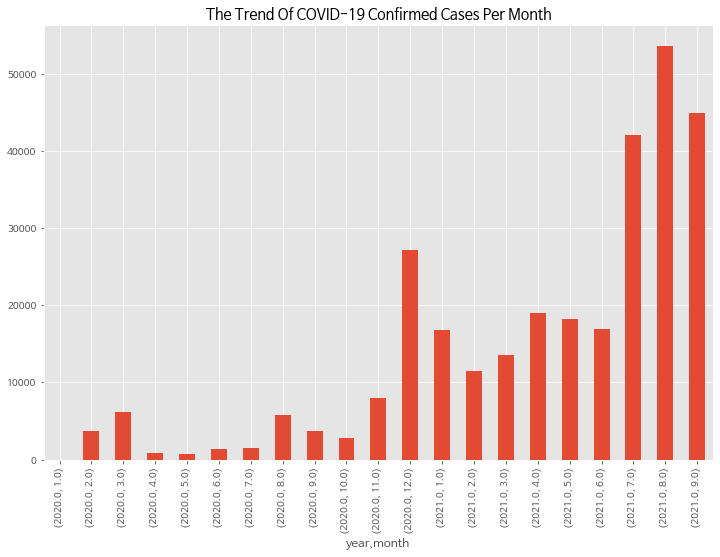

In [8]:
# 코로나 월별 확진자 시각화

covid_data_new.groupby(['year','month']).daily_decideCnt.sum().plot(kind='bar',figsize=(12,8), title = "The Trend Of COVID-19 Confirmed Cases Per Month")

일별 확진자 확인 결과, 2020년 3월, 2020년 8월, 2020년 12월, 2021년 8월 총 4차례의 대유행이 발생 했음을 알 수 있다. 

In [9]:
# 대유행 기간 확진자 수 추출

covid_data_1st_pandemic=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==2)|(covid_data_new.month==3))]
covid_data_2nd_pandemic=covid_data_new[(covid_data_new.year==2020) & ((covid_data_new.month==8)|(covid_data_new.month==9))]
covid_data_3rd_pandemic=covid_data_new[((covid_data_new.year==2020) & ((covid_data_new.month==12)|(covid_data_new.month==11)))|
                ((covid_data_new.year==2021)&((covid_data_new.month==1)|(covid_data_new.month==2)))]
covid_data_4th_pandemic=covid_data_new[(covid_data_new.year==2021) & ((covid_data_new.month==6)|(covid_data_new.month==7)|(covid_data_new.month==8)|(covid_data_new.month==9))]

covid_data_1st_pandemic.head()

,daily_decideCnt,decideCnt,deathCnt,year,month
stateDt,,,,,
2020-03-31,101.0,9786.0,162.0,2020.0,3.0
2020-03-30,125.0,9661.0,158.0,2020.0,3.0
2020-03-29,78.0,9583.0,152.0,2020.0,3.0
2020-03-28,105.0,9478.0,144.0,2020.0,3.0
2020-03-27,146.0,9332.0,139.0,2020.0,3.0


<AxesSubplot:title={'center':'Trend Of The 4th Pandemic'}, xlabel='stateDt', ylabel='daily_decideCnt'>

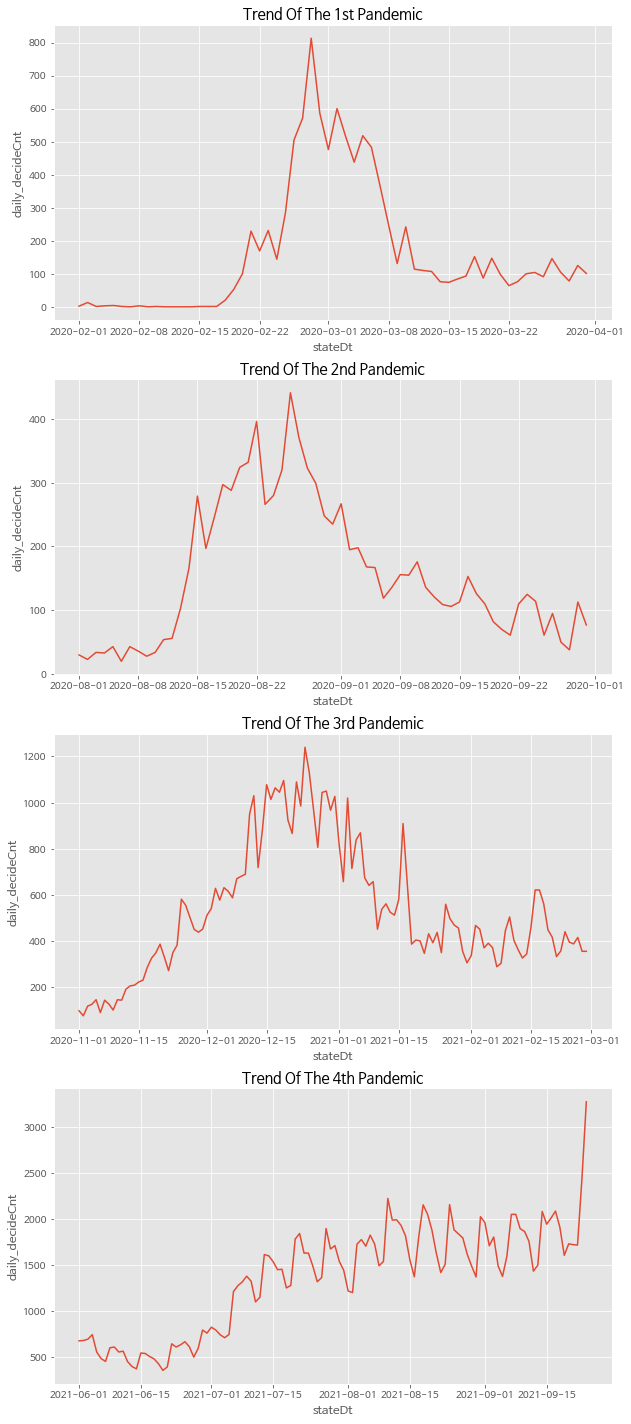

In [10]:
# 대유행 기간 확진자 수 시각화

fig, axes=plt.subplots(nrows=4)
fig.set_size_inches(10,25)

axes[0].set(title='Trend Of The 1st Pandemic')
axes[1].set(title='Trend Of The 2nd Pandemic')
axes[2].set(title='Trend Of The 3rd Pandemic')
axes[3].set(title='Trend Of The 4th Pandemic')

sns.lineplot(data=covid_data_1st_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[0])
sns.lineplot(data=covid_data_2nd_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[1])
sns.lineplot(data=covid_data_3rd_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[2])
sns.lineplot(data=covid_data_4th_pandemic,x='stateDt', y='daily_decideCnt', ax=axes[3])

4차례의 대유행이 시각화로 뚜렷하게 표현되며, 4차 대유행은 여전히 진행중이다.

([<matplotlib.patches.Wedge at 0x2577a82d7f0>,
 [Text(-0.807759249318728, -0.7466759639495871, '2020.0'),
  Text(0.8077592143643026, 0.7466760017635258, '2021.0')],
 [Text(-0.4405959541738516, -0.4072777985179566, '20.7%'),
  Text(0.4405959351078014, 0.40727781914374134, '79.3%')])

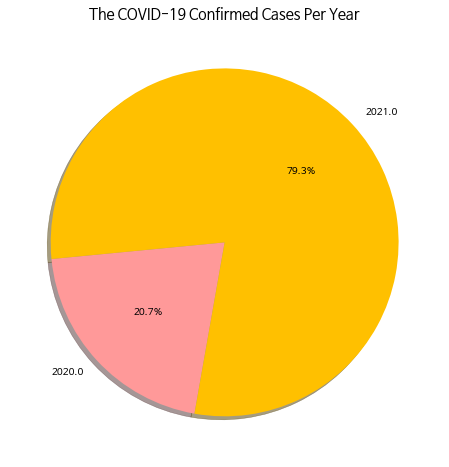

In [11]:
# 코로나 년도별 확진자 시각화

labels=covid_data_new.groupby(['year']).daily_decideCnt.sum().index
values=covid_data_new.groupby(['year']).daily_decideCnt.sum().values
colors = ['#ff9999', '#ffc000']

plt.figure(figsize=(8,8))
plt.title('The COVID-19 Confirmed Cases Per Year')
plt.pie(values, labels=labels, autopct='%.1f%%', startangle=260, counterclock=False, shadow=True, colors=colors)

년도별 코로나 확진자 수를 확인해본 결과, 아직 2021년이 끝나지 않았음에도 불구하고, 2021년의 확진자 수는 2020년의 확진자 수의 4배에 근접한다.